# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [6]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\johnm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Read your api key environment variable
# YOUR CODE HERE!
news_api_key = os.getenv("NEWS_API_KEY", "aa289641859f42838d8ae8c84f843a18")

In [8]:
# Create a newsapi client
# YOUR CODE HERE!
from newsapi import NewsApiClient
news_api = NewsApiClient(api_key = news_api_key)

In [9]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_headlines = news_api.get_everything(q="bitcoin",
                                    language="en",
                                     page_size=100,
                                       sort_by="relevancy"
                                       )


      
# Shaw sample article 
btc_headlines["articles"][0]      

{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin',
 'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…",
 'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html',
 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca',
 'publishedAt': '2021-09-16T13:26:42Z',
 'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"}

In [10]:
print(btc_headlines)

{'status': 'ok', 'totalResults': 6595, 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'}, 'author': 'Jon Fingas', 'title': 'AMC theaters will accept cryptocurrencies beyond Bitcoin', 'description': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bitcoin Cash when crypto payments are available. He didn't hav…", 'url': 'https://www.engadget.com/amc-theaters-accept-ethereum-litecoin-bitcoin-cash-132642183.html', 'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-09/4a01cb80-16eb-11ec-abfe-c7b840dd48ca', 'publishedAt': '2021-09-16T13:26:42Z', 'content': "You won't have to stick to Bitcoin if you're determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]"}, {'source': {'id': 'techcrunch', 'name': 'TechCru

In [11]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
Ethereum_headlines = news_api.get_everything(
    q="Ethereum",
    language="en",
    
)

# Show sample article
Ethereum_headlines["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Offchain Labs raises $120 million to hide Ethereum’s shortcomings with its Arbitrum product',
 'description': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized apps on the Ethereum blockchain. The popular network has see…',
 'url': 'http://techcrunch.com/2021/08/31/offchain-labs-raises-120-million-to-hide-ethereums-shortcomings-with-arbitrum-scaling-product/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/08/Image-from-iOS-5.jpg?w=533',
 'publishedAt': '2021-08-31T12:30:39Z',
 'content': 'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars]'}

In [12]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!

Bitcoin_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()    

,Compound,Positive,Negative,Neutral,Text
0,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...
1,0.4215,0.098,0.000,0.902,PayPal will now allow users outside the U.S. t...
2,0.1779,0.052,0.000,0.948,A recently-installed Bitcoin ATM.\r\n\n \n\n A...
3,0.1280,0.046,0.000,0.954,The government of El Salvador purchased at lea...
4,0.6908,0.161,0.000,0.839,"PayPal is bringing the ability to buy, hold an..."


In [13]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()    

,Compound,Positive,Negative,Neutral,Text
0,0.7351,0.167,0.000,0.833,As the broader crypto world enjoys a late summ...
1,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...
2,0.4215,0.098,0.000,0.902,PayPal will now allow users outside the U.S. t...
3,0.2865,0.180,0.126,0.694,OpenSea isn't wasting much time after its head...
4,0.6908,0.161,0.000,0.839,"PayPal is bringing the ability to buy, hold an..."


In [21]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.115915,0.062540,0.031010,0.906440
std,0.345135,0.057563,0.050278,0.075985
min,-0.757900,0.000000,0.000000,0.708000
25%,0.000000,0.000000,0.000000,0.843000
50%,0.077200,0.052500,0.000000,0.915500
75%,0.340000,0.099000,0.054250,0.959250
max,0.811600,0.213000,0.208000,1.000000


In [23]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.199415,0.073050,0.026000,0.901050
std,0.354876,0.060995,0.049188,0.074667
min,-0.670500,0.000000,0.000000,0.694000
25%,0.000000,0.000000,0.000000,0.845000
50%,0.256400,0.078500,0.000000,0.906000
75%,0.445000,0.105250,0.037750,0.952500
max,0.735100,0.180000,0.169000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum = 0.073050

Q: Which coin had the highest compound score?

A: Ethereum = 0.354876

Q. Which coin had the highest positive score?

A: Ethereum .060995

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [24]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [102]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

print(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [103]:
print(Bitcoin_df, [])

    Compound  Positive  Negative  Neutral  \
0     0.5574     0.127     0.036    0.838   
1     0.4215     0.098     0.000    0.902   
2     0.1779     0.052     0.000    0.948   
3     0.1280     0.046     0.000    0.954   
4     0.6908     0.161     0.000    0.839   
..       ...       ...       ...      ...   
95    0.2732     0.062     0.000    0.938   
96    0.7003     0.182     0.000    0.818   
97   -0.3182     0.030     0.066    0.904   
98    0.0000     0.000     0.000    1.000   
99   -0.7003     0.000     0.177    0.823   

                                                 Text  
0   You won't have to stick to Bitcoin if you're d...  
1   PayPal will now allow users outside the U.S. t...  
2   A recently-installed Bitcoin ATM.\r\n\n \n\n A...  
3   The government of El Salvador purchased at lea...  
4   PayPal is bringing the ability to buy, hold an...  
..                                                ...  
95  Jack Dorsey, one of bitcoin's biggest advocate...  
96  Graysca

In [120]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    sw = set(stopwords.words("english"))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [124]:
# Create a new tokens column for bitcoin
btc_tokens = []
for i in Bitcoin_df['Text']:
    tokenized_text = tokenizer(i)
    btc_tokens.append({'tokens':tokenized_text})

btc_tokens_df = pd.DataFrame(btc_tokens)
Bitcoin_df['tokens'] = btc_tokens_df
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.5574,0.127,0.036,0.838,You won't have to stick to Bitcoin if you're d...,"[wont, stick, bitcoin, youre, determined, pay,..."
1,0.4215,0.098,0.000,0.902,PayPal will now allow users outside the U.S. t...,"[paypal, allow, user, outside, us, buy, hold, ..."
2,0.1779,0.052,0.000,0.948,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,"[recentlyinstalled, bitcoin, atm, today, bitco..."
3,0.1280,0.046,0.000,0.954,The government of El Salvador purchased at lea...,"[government, el, salvador, purchased, least, b..."
4,0.6908,0.161,0.000,0.839,"PayPal is bringing the ability to buy, hold an...","[paypal, bringing, ability, buy, hold, sell, c..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [129]:
from collections import Counter
from nltk import ngrams

In [130]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    big_string = " ".join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_15 = dict(Counter(bigrams).most_common(15))
    return pd.DataFrame(list(top_15.items()), columns=['word','count'])

In [131]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
corpus = Bitcoin_df["Text"]
bigram_counter(corpus)

,word,count
0,"(el, salvador)",26
1,"(legal, tender)",19
2,"(bitcoin, legal)",14
3,"(sept, reuters)",12
4,"(illustration, taken)",11
5,"(el, salvadors)",11
6,"(aug, reuters)",10
7,"(reuters, el)",10
8,"(cryptocurrency, bitcoin)",9
9,"(char, representation)",8


In [134]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

corpus = Ethereum_df["Text"]
bigram_counter(corpus)

,word,count
0,"(first, time)",3
1,"(adam, aron)",2
2,"(char, paypal)",2
3,"(buy, hold)",2
4,"(hold, sell)",2
5,"(nonfungible, token)",2
6,"(char, vitalik)",2
7,"(buterin, ha)",2
8,"(vitalik, buterin)",2
9,"(broader, crypto)",1


In [138]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [139]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_words = []
for text in Bitcoin_df['tokens']:
    for word in text:
        btc_words.append(word)
        
token_count(btc_words)

[('char', 96), ('bitcoin', 93), ('el', 42)]

In [145]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
ethereum_words = []
for text in Ethereum_df['tokens']:
    for word in text:
        ethereum_words.append(word)
        
token_count(eth_words)

KeyError: 'tokens'

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [146]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

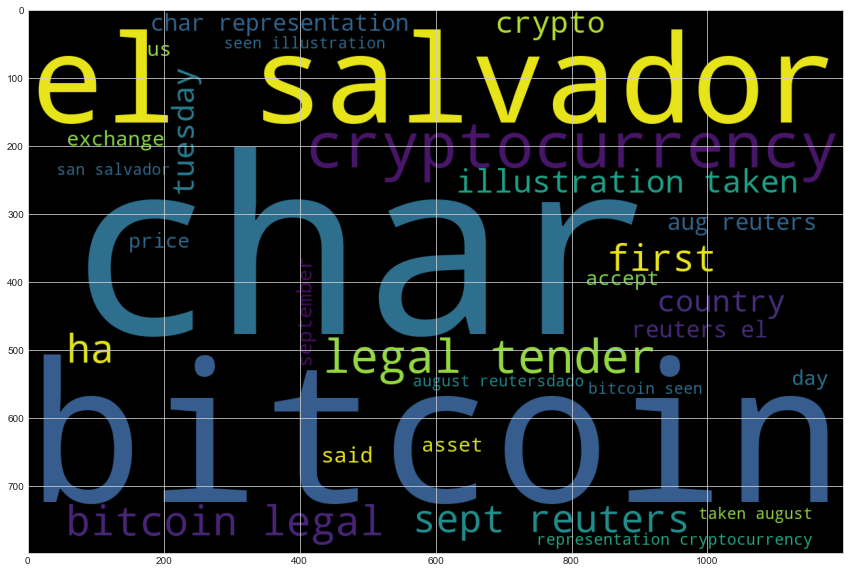

In [148]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
def stringmaker(words):
    big_string = " ".join(words)
    return big_string

btc_words = stringmaker(btc_words)
eth_words = stringmaker(eth_words)

btc_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(btc_words)

plt.imshow(btc_word_cloud)

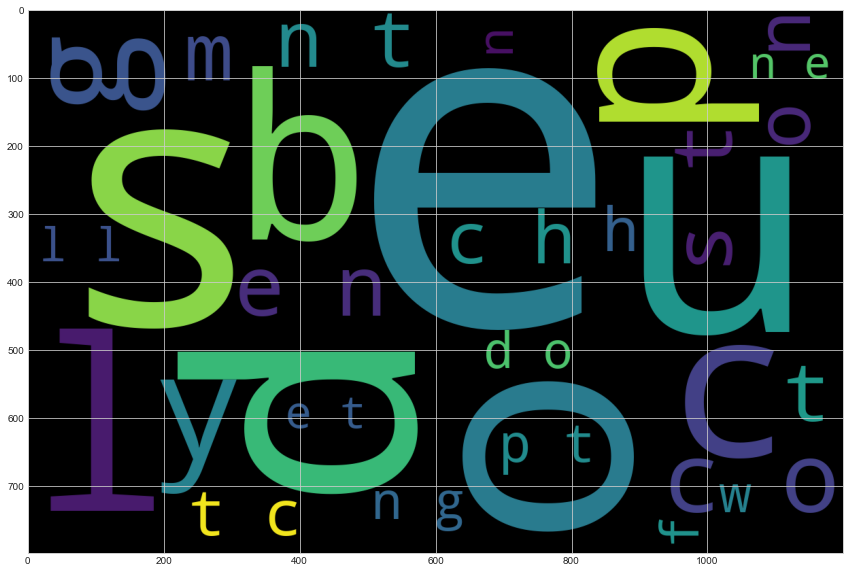

In [149]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
def stringmaker(words):
    big_string = " ".join(words)
    return big_string

btc_words = stringmaker(btc_words)
eth_words = stringmaker(eth_words)

eth_word_cloud = WordCloud(width=1200, height=800, max_words=30).generate(btc_words)

plt.imshow(eth_word_cloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [54]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

In [55]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [150]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
articles = Bitcoin_df["Text"].str.cat()
articles

'You won\'t have to stick to Bitcoin if you\'re determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars]The government of El Salvador purchased at least 200 bitcoin recently, ahead of the country officially recognizing bitcoin as a form of legal currency on Tuesday. The purchase brings the governments … [+3142 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year af

In [151]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(articles)

# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title'] = 'Bitcoin NER'

In [152]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [153]:
# List all Entities
# YOUR CODE HERE
for ent in doc.ents:
    print (ent, ent.label_)

AMC ORG
Adam Aron PERSON
Ethereum PERSON
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Bitcoin ATM ORG
today DATE
El Salvador GPE
US GPE
Central American NORP
first ORDINAL
El Salvador GPE
at least 200 CARDINAL
Tuesday DATE
a year DATE
US GPE
Thousands CARDINAL
El Salvador GPE
Nayi PERSON
Joe PERSON
TidyCyber reporter MONEY
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
chars]New York GPE
CNN ORG
a volatile day DATE
about 10% PERCENT
Tuesday DATE
$43,000 mark MONEY
El Salvador GPE
June DATE
chars]8 ORG
just days DATE
September DATE
spring DATE
Rebecca McMackin PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File Photo/File Photo/File Photo/File PhotoSept 7 ORG
Reuters ORG
UK GPE
first ORDINAL
four CARDINAL
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File ORG
15 CARDINAL
Reuters ORG
Adam Aron PERSON
El Zonte GPE
El Salvador GPE
Bitcoin Beach GPE
Central American NORP
Conway G. Gittens PERSON
27 CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE


---

### Ethereum NER

In [155]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
articles = Ethereum_df["Text"].str.cat()
articles

'As the broader crypto world enjoys a late summer surge in enthusiasm, more and more blockchain developers who have taken the plunge are bumping into the blaring scaling issues faced by decentralized … [+3414 chars]You won\'t have to stick to Bitcoin if you\'re determined to pay for your movie ticket with cryptocurrency. AMC chief Adam Aron has revealed his theater chain will also accept Ethereum, Litecoin and Bi… [+1198 chars]PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]OpenSea isn\'t wasting much time after its head of product was accused of exploiting insider information to turn a profit on non-fungible tokens. The marketplace has asked for and accepted Nate Chasta… [+924 chars]PayPal is bringing the ability to buy, hold and sell cryptocurrencies across to the other side of the pond, the better part of a year after i

In [156]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
doc = nlp(articles)
# Add a title to the document
# YOUR CODE HERE!
doc.user_data['title'] = 'Ethereum NER'

In [157]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(doc, style='ent')

In [158]:
# List all Entities
# YOUR CODE HERE!
for ent in doc.ents:
    print (ent, ent.label_)

late summer DATE
AMC ORG
Adam Aron PERSON
Ethereum PERSON
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Nate Chasta PERSON
+924 ORG
a year DATE
US GPE
Monday DATE
Poly Network ORG
White PERSON
Buterin GPE
Vitalik Buterin PERSON
2013 DATE
Getty Images PERSON
John Phillips PERSON
Vitalik Buterin PERSON
eight CARDINAL
this past weekend DATE
Elizabeth Warren PERSON
AFP ORG
Getty Images ORG
Elizabeth Warren PERSON
Sullivan PERSON
Getty Images
Citigroup ORG
CoinDesk PRODUCT
two CARDINAL
one CARDINAL
25 CARDINAL
Reuters ORG
September DATE
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/Illustration/File ORG
15 CARDINAL
Reuters ORG
Adam Aron PERSON
above $100 MONEY
first ORDINAL
Monday DATE
more than 200% PERCENT
August DATE
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
2015 DATE
John Phillips PERSON
Vitalik Buterin PERSON
Time ORG
100 CARDINAL
the past decade DATE
Kyle Russell PERSON
Playbyte ORG
Last Friday DATE
Dom Hofmann PERSON
one CARDINAL
Rosenfeld PERSON
FTX ORG
500 MO

---